In [1]:
import wrangle
import evaluate2 as evaluate

In [2]:
train, val, test = wrangle.wrangle_wine()

In [3]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
2391,6.40,0.46,0.08,4.90,0.05,34.00,144.00,0.99,3.10,0.56,10.00,5,white
989,9.70,0.29,0.40,1.50,0.07,14.00,21.00,1.00,3.14,0.51,10.90,6,red
2805,7.00,0.26,0.46,15.55,0.04,61.00,171.00,1.00,2.94,0.35,8.80,6,white
2909,5.20,0.36,0.08,13.50,0.04,37.00,142.00,1.00,3.46,0.39,9.90,6,white
41,8.80,0.61,0.30,2.80,0.09,17.00,46.00,1.00,3.26,0.51,9.30,4,red


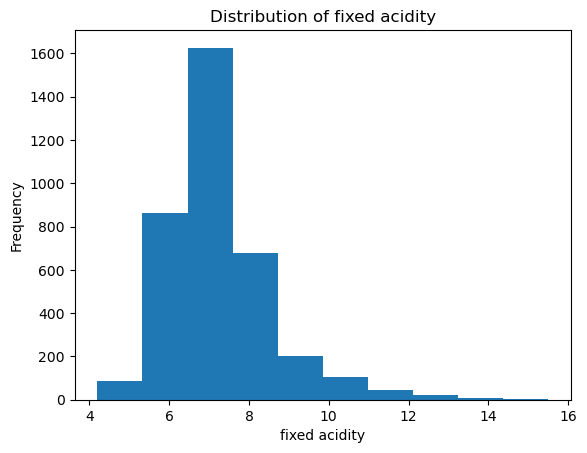

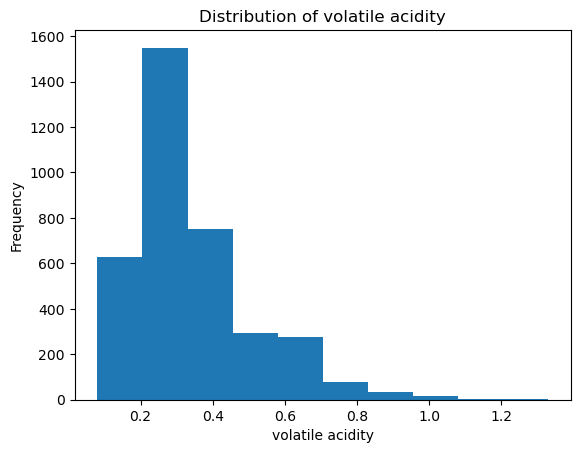

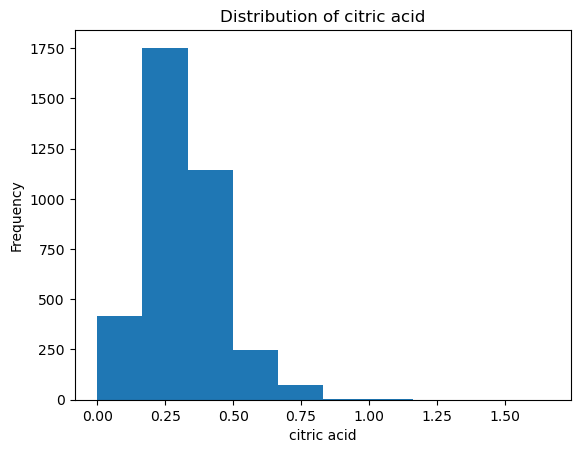

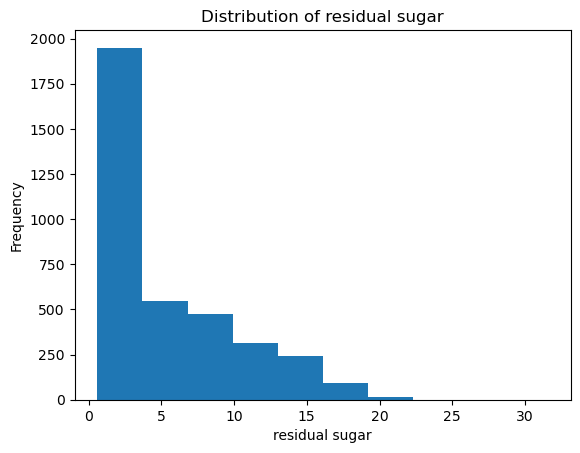

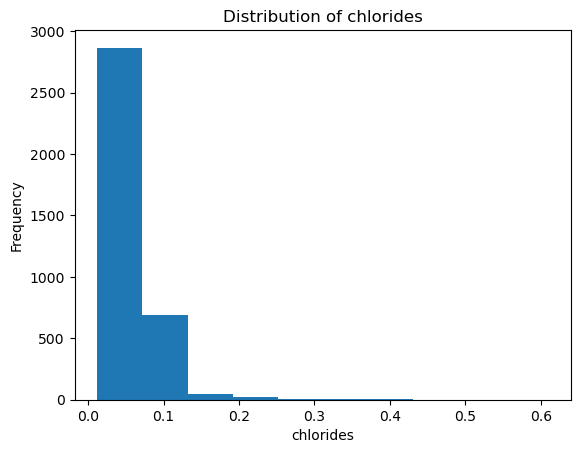

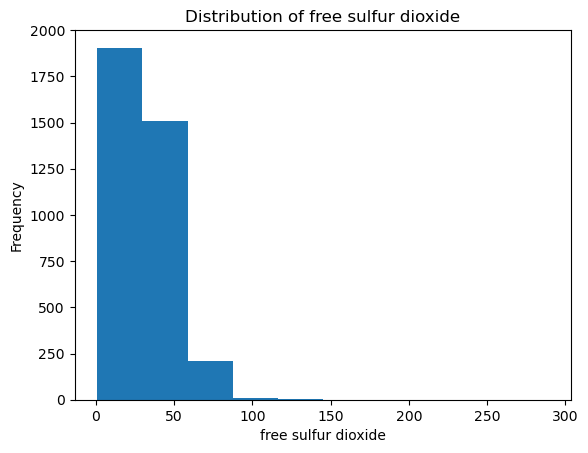

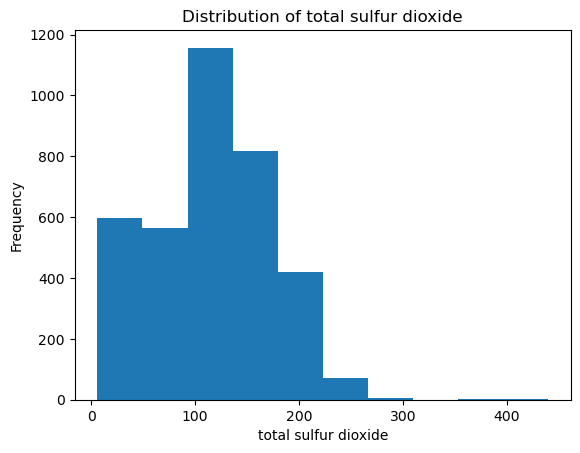

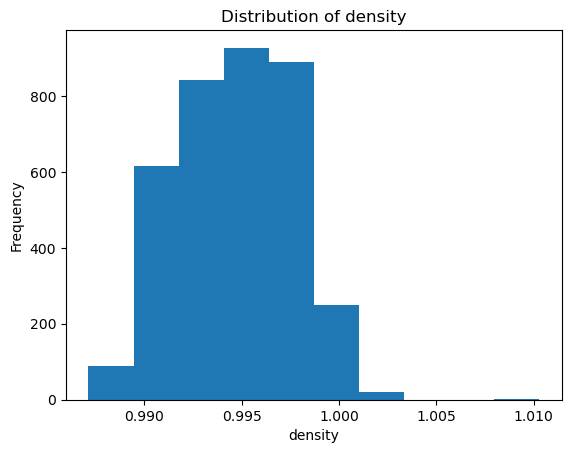

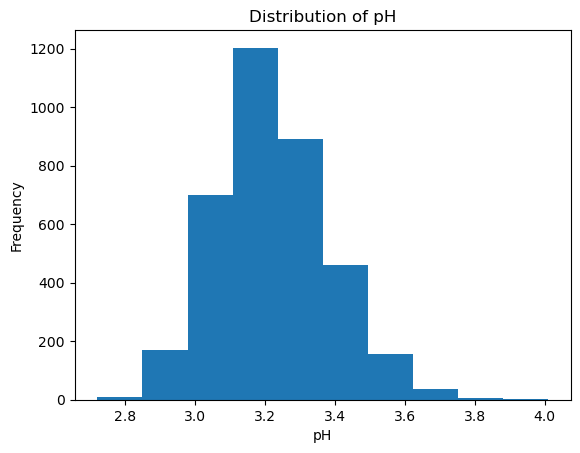

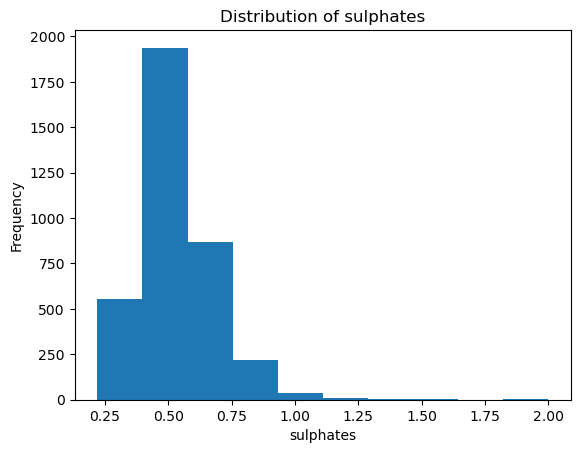

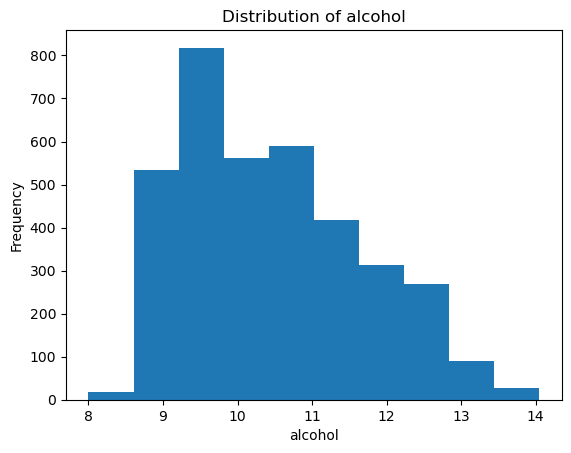

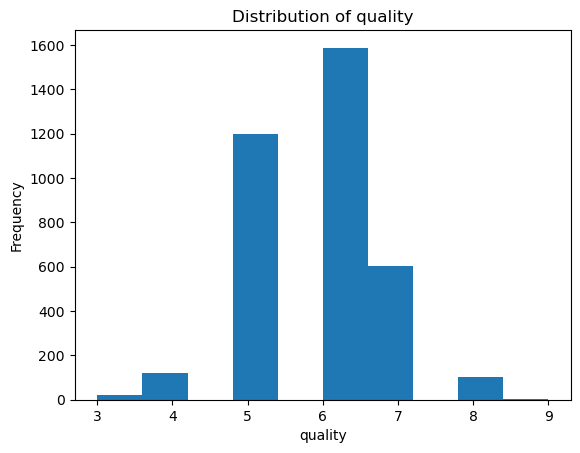

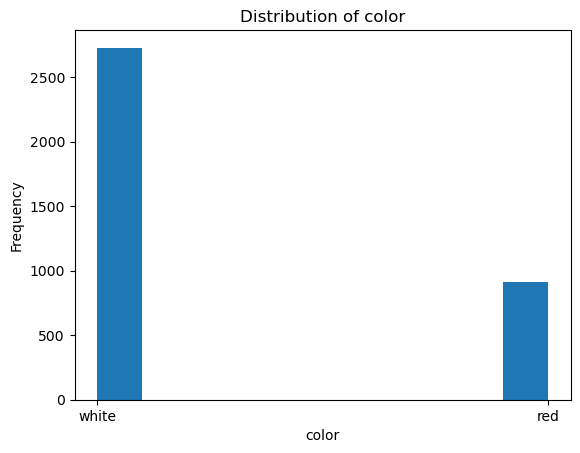

In [4]:
for col in train.columns:
    evaluate.show_distribution(train, col)

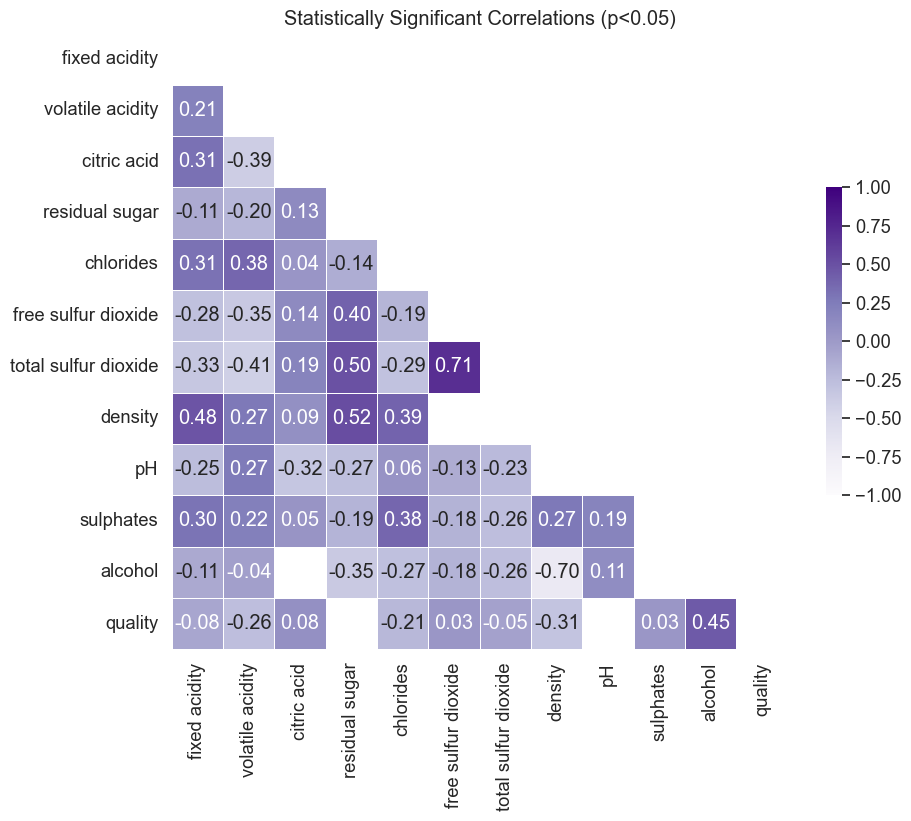

In [5]:
evaluate.visualize_corr(train.drop(columns='color'))

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy import stats

In [7]:
evaluate.select_kbest(train.drop(columns=['quality','color']), train.quality, k=4)

['volatile acidity', 'chlorides', 'density', 'alcohol']

In [8]:
evaluate.rfe(train.drop(columns=['quality','color']), train.quality, k=4)

['volatile acidity', 'chlorides', 'density', 'sulphates']

In [9]:
evaluate.print_corr_table(train.drop(columns='color'),'quality')

Correlation Coefficients and P-Values:
                      corr_coef  p_value
quality                    1.00     0.00
alcohol                    0.45     0.00
density                   -0.31     0.00
volatile acidity          -0.26     0.00
chlorides                 -0.21     0.00
citric acid                0.08     0.00
fixed acidity             -0.08     0.00
total sulfur dioxide      -0.05     0.00
free sulfur dioxide        0.03     0.04
sulphates                  0.03     0.04
pH                         0.03     0.13
residual sugar            -0.02     0.15


In [10]:
X_cols = train.drop(columns= ['quality','color']).columns

In [11]:
X_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [12]:
y_cols = train.quality

In [22]:
train_scaled, val_scaled, test_scaled = evaluate.scale_data(train,val,test,columns_to_scale=X_cols)

In [25]:
from sklearn.cluster import KMeans

In [30]:
k_means_prototype = KMeans(n_clusters=7)
k_means_prototype.fit(train_scaled[X_cols])
clusters = k_means_prototype.predict(train_scaled[X_cols]) 

In [31]:
train_scaled['cluster_assigned'] = clusters

In [ ]:
plt.figure(figsize=(12,12))
for cluster in train_scaled.cluster_assigned.unique():
    plt.scatter(train_scaled[train_scaled.cluster_assigned == cluster].alcohol,
             train_scaled[train_scaled.cluster_assigned == cluster].cholorides,
               label=cluster)
plt.title('Clusters????')
plt.legend()
plt.show()

In [ ]:
sns.scat

In [14]:
conditions = [
    (train.quality == 3) | (train.quality == 4) | (train.quality == 5),
    (train.quality == 6) | (train.quality == 7),
    (train.quality == 8) | (train.quality == 9)
]

values = ['low', 'medium', 'high']

train['quality_bins'] = np.select(conditions, values, default=np.nan)

In [15]:
train.quality_bins.value_counts()

medium    2191
low       1337
high       109
Name: quality_bins, dtype: int64

In [16]:
train.quality.value_counts()

6    1587
5    1198
7     604
4     119
8     104
3      20
9       5
Name: quality, dtype: int64

In [17]:
val.quality.value_counts()

6    675
5    523
7    258
4     53
8     46
3      5
Name: quality, dtype: int64

In [18]:
test.quality.value_counts()

6    574
5    417
7    217
4     44
8     43
3      5
Name: quality, dtype: int64

In [19]:
red = pd.read_csv('https://query.data.world/s/6ydfnt5m4fjpceorhly36l6wlw6kas?dws=00000')

In [20]:
conditions = [
    (red.quality == 3) | (red.quality == 4) | (red.quality == 5),
    (red.quality == 6) | (red.quality == 7)| (red.quality == 8) | (red.quality == 9)
]

values = ['low', 'high']

red['quality_bins'] = np.select(conditions, values, default=np.nan)

NameError: name 'plt' is not defined

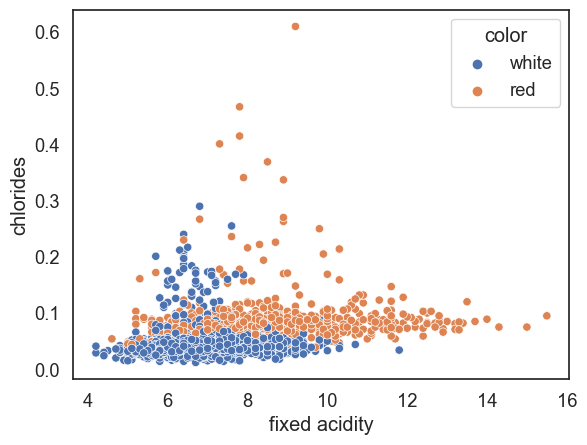

In [21]:
for traincol in train.columns:
    sns.scatterplot(x= train[traincol], y=train.chlorides, hue=train.color)
    plt.show()

In [ ]:
for redcol in red.columns:
    sns.scatterplot(x= red[redcol], y=red.chlorides, hue=red.quality_bins)
    plt.show()

In [ ]:
figsize=(20, 20)
sns.scatterplot(x= red.alcohol, y=red.chlorides, hue=red.quality_bins)
plt.show()

In [ ]:
conditions = [
    (train.quality == 3) | (train.quality == 4) | (train.quality == 5),
    (train.quality == 6), 
    (train.quality == 7) | (train.quality == 8) | (train.quality == 9)
]


values = ['low', 'medium', 'high']

train['quality_bins'] = np.select(conditions, values, default=np.nan)

In [ ]:
train = evaluate.remove_outliers(train, k=1.5, col_list= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])